In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('Movie dataset.csv', encoding='ISO-8859-1')

In [3]:
data.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3181,Coat,(2021),NaN,"Drama, Family",NaN,NaN,Akshay Ditti,Sanjay Mishra,Sonal Jha,Vivaan Shah
5677,Heroine Ek Raat Ki,(1979),NaN,Drama,NaN,NaN,Raj Wadhwa,Beena Bawa,Harish,Shehnaaz
12207,Saheli,(1965),NaN,Romance,6.4,10,Arjun Hingorani,Pradeep Kumar,Vijaya Choudhury,Rajendranath Malhotra
11484,Raghuveer,(1995),151 min,"Action, Drama",4.3,86,K. Pappu,Sunil Shetty,Shilpa Shirodkar,Suresh Oberoi
2429,Black Market,(1947),NaN,"Action, Thriller",NaN,NaN,S.H. Tharani,Dulari,Dilawar,Habib


In [4]:
data.shape

(15509, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
data['Genre'].nunique()

485

In [7]:
data['Genre'] = data['Genre'].fillna('Unknown')
data['Director'] = data['Director'].fillna('Unknown')
data['Actor 1'] = data['Actor 1'].fillna('Unknown')
data['Actor 2'] = data['Actor 2'].fillna('Unknown')
data['Actor 3'] = data['Actor 3'].fillna('Unknown')

In [8]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre          0
Rating      7590
Votes       7589
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [9]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [10]:
print(data['Votes'].dtype) 

object


In [11]:
data.sample(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
7018,Kaaran,(1981),NaN,"Drama, Family",5.841621,NaN,B.R. Ishara,Shoma Anand,Ramesh Deo,Aruna Irani
3092,Chor Chor,(1974),NaN,"Crime, Drama, Thriller",6.700000,23,Prem Prakash,Vijay Anand,Leena Chandavarkar,Trilok Kapoor
11214,Pyaasa Sawan,(1981),161 min,"Family, Romance",7.400000,77,Narayana Rao Dasari,Jeetendra,Reena Roy,Vinod Mehra
14811,Veera Parampare,(2010),NaN,"Drama, Family",6.800000,79,S. Narayan,Ambarish,Sudeep,Aindrita Ray
10308,Oh No Masti,NaN,NaN,Unknown,5.841621,NaN,Rajeev Srivastava,Unknown,Unknown,Unknown
4606,Family: Ties of Blood,(2006),150 min,"Action, Crime, Drama",5.600000,"1,866",Rajkumar Santoshi,Amitabh Bachchan,Akshay Kumar,Bhoomika Chawla
7955,Kyaa Dil Ne Kahaa,(2002),NaN,"Family, Romance",3.000000,255,Sanjay Chhel,Rajesh Khanna,Tusshar Kapoor,Esha Deol
9063,Mee Sindhutai Sapkal,(2010),110 min,"Biography, Drama",6.900000,126,Ananth Narayan Mahadevan,Jyoti Chandekar,Ameya Hunaswadkar,Neena Kulkarni
12810,Shahrukh Bola 'Khoobsurat Hai Tu'... And She B...,(2010),89 min,"Comedy, Drama",5.000000,"1,043",Makrand Deshpande,Suzanne Bernert,Nagesh Bhonsle,Pritika Chawla
542,Ab Tumhari Bari,(2005),NaN,Horror,5.841621,NaN,Mohan Bhakri,Rana Jung Bahadur,Sunil Dhawan,Tina Ghai


In [12]:
# remove commas from Votes column and convert to integer
data['Votes'] = data['Votes'].astype(str).str.replace(',', '',regex = False)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'] = data['Votes'].fillna(data['Votes'].mean())


In [13]:
data.isnull().sum()


Name           0
Year         528
Duration    8269
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [14]:
data['Duration'] = data['Duration'].astype(str).str.replace('min', '',regex = False)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'] = data['Duration'].fillna(data['Duration'].median())

In [15]:
data.dropna(subset = ['Year'],inplace = True)

In [16]:
data.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
data.shape

(14981, 10)

In [18]:
data.describe()

,Duration,Rating,Votes
count,14981.000000,14981.000000,14981.000000
mean,129.797277,5.841621,1938.520394
std,19.922673,1.004592,8435.294955
min,2.000000,1.100000,5.000000
25%,131.000000,5.841621,47.000000
50%,131.000000,5.841621,1938.520394
75%,131.000000,6.100000,1938.520394
max,321.000000,10.000000,591417.000000


## EDA

In [19]:
# Combine all actor columns into a single Series
# Remove rows where any actor is 'Unknown'
data = data[
    (data['Actor 1'] != 'Unknown') &
    (data['Actor 2'] != 'Unknown') &
    (data['Actor 3'] != 'Unknown')
]
all_actors = pd.concat([data['Actor 1'], data['Actor 2'],data['Actor 3']])
# Count appearances of each actor
actor_counts = all_actors.value_counts()
top_10_actors = actor_counts.head(10)
print(top_10_actors)



Mithun Chakraborty    240
Dharmendra            229
Ashok Kumar           225
Jeetendra             179
Amitabh Bachchan      171
Rekha                 142
Rajesh Khanna         137
Shashi Kapoor         133
Shatrughan Sinha      129
Raj Babbar            127
Name: count, dtype: int64


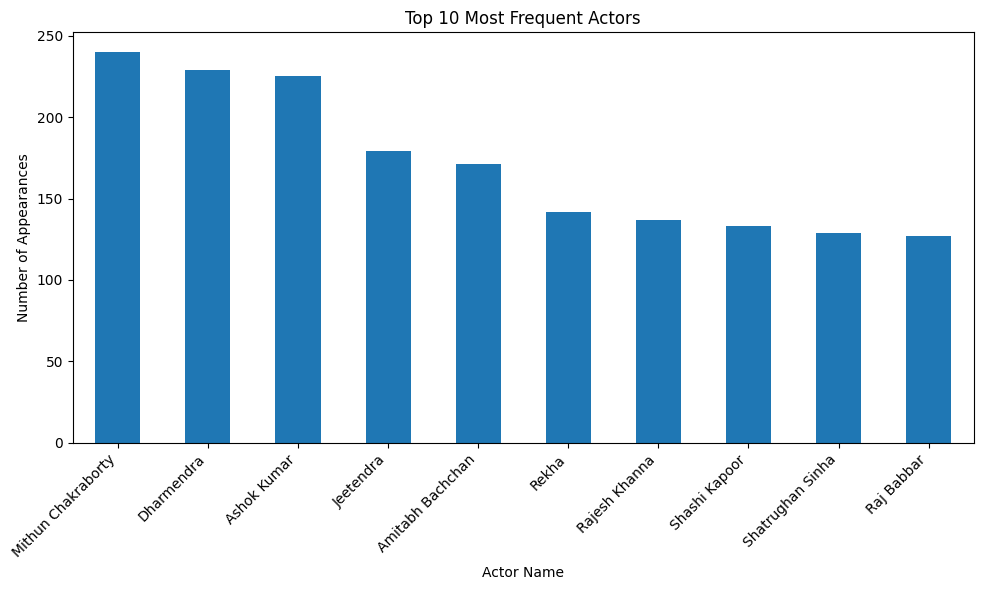

In [20]:
# Plotting the top 10 actors
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='bar')

plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Actor Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
# top 10 movies based on rating
top_movie = data.loc[data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79.0,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),131.0,Drama,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,(2020),113.0,Drama,9.4,16.0,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,(2021),93.0,Drama,9.4,18.0,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,(2019),105.0,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
12673,Secrets of Sinauli,(2021),56.0,"Documentary, History",9.3,1373.0,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
8344,Love Sorries,(2021),101.0,"Comedy, Drama, Romance",9.3,79.0,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
5125,God of gods,(2019),90.0,Documentary,9.3,46.0,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
13231,Sindhustan,(2019),64.0,"Documentary, Family, History",9.3,36.0,Sapna Bhavnani,Leila Advani,Laj Badlani,Chaho Bhara


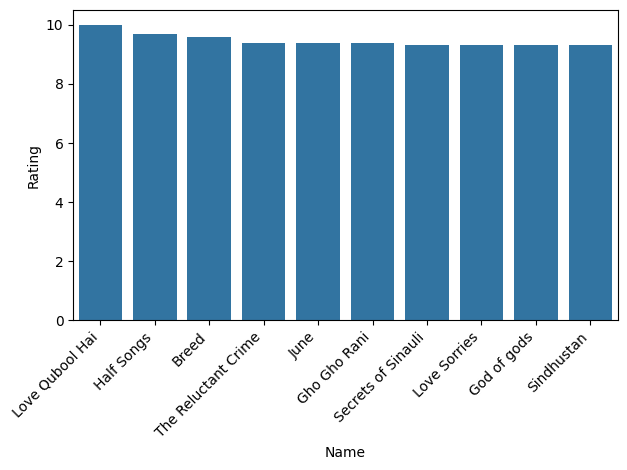

In [22]:
sns.barplot(x = 'Name', y ='Rating', data = top_movie )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# top 10 genres
genre_counts = data['Genre'].value_counts()
top_10_genres = genre_counts.head(10)
print(top_10_genres)

Genre
Drama                   2116
Action                   991
Unknown                  988
Drama, Romance           507
Romance                  504
Action, Crime, Drama     452
Drama, Family            405
Thriller                 404
Comedy                   401
Action, Drama            308
Name: count, dtype: int64


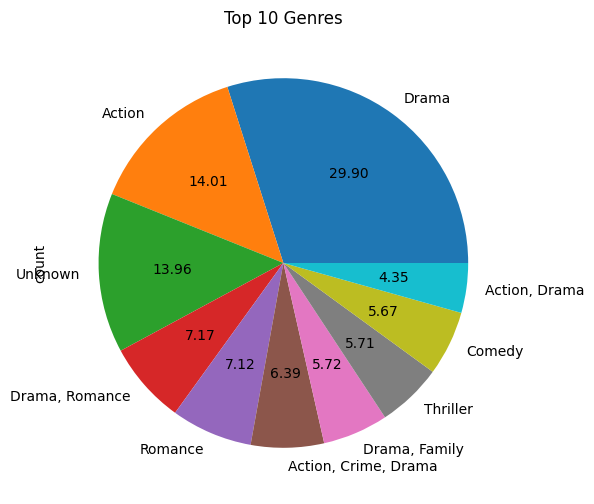

In [24]:
# Plotting the top 10 genres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='pie',autopct = '%0.2f')
plt.title('Top 10 Genres')
plt.show()

In [25]:
# Distribution of number of movie released every year
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.extract(r'(\d{4})').astype(int)
yearly_movie_counts = data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
93,1915,1
94,1917,1
92,1928,2
95,1930,1
90,1931,20
...,...,...
2,2018,304
0,2019,350
4,2020,263
1,2021,321


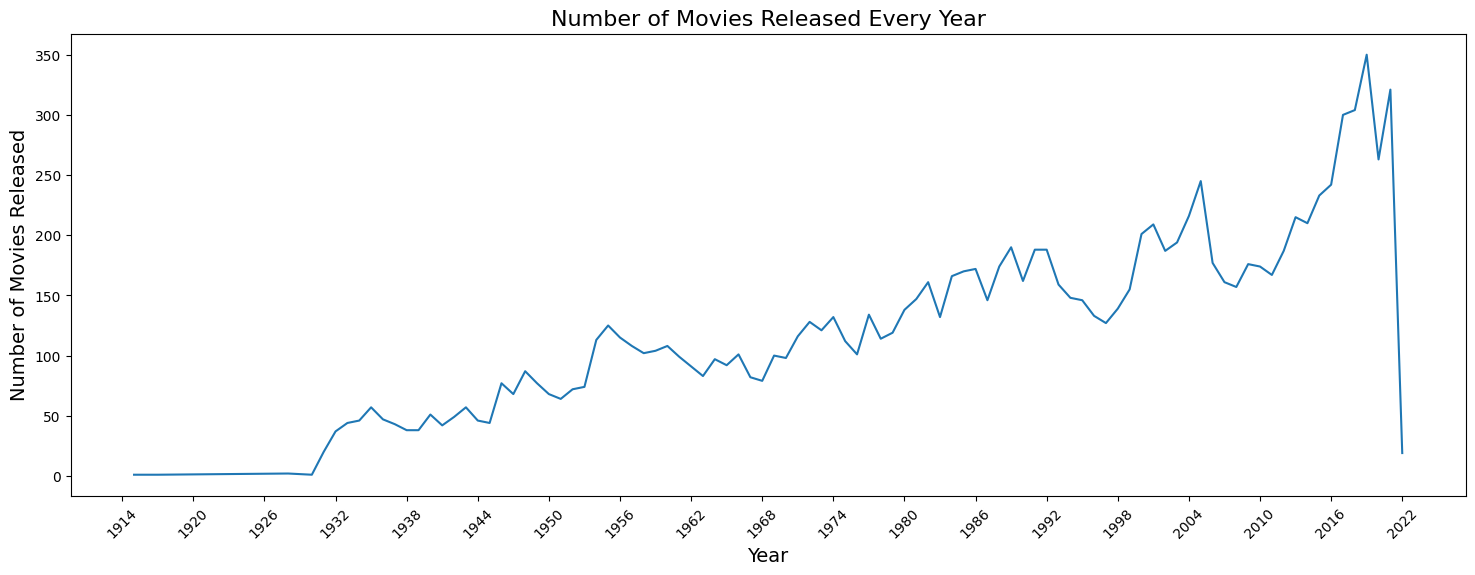

In [26]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(18, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')
plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.xticks(rotation=45)
years = yearly_movie_counts['Year']
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True,nbins = 20))
plt.show()

In [27]:
# Distribution of Top directors by average rating

# Group the data by director and calculate the average rating
director_avg_rating = data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
3600,Saif Ali Sayeed,10.0
4092,Sriram Raja,9.7
809,Bobby Kumar,9.6
521,Arvind Pratap,9.4
4153,Suhrud Godbole,9.4
2434,Munni Pankaj,9.4
4492,Venkatesh Bk,9.3
3005,Raghav Jairath,9.3
3739,Sapna Bhavnani,9.3
3029,Rahul Mallick,9.3


In [28]:
# Distribution of Top actors by average rating

# Group the data by actor and calculate the average rating
actor_avg_rating = data.groupby('Actor 1')['Rating'].mean().reset_index()

actor_avg_rating = actor_avg_rating.sort_values(by='Rating', ascending=False)

top_actors = actor_avg_rating.head(10)
top_actors

,Actor 1,Rating
120,Ahaan Jha,10.0
2621,Raj Banerjee,9.7
1002,Dharmendra Ahir,9.4
3735,Vaibhav Khisti,9.4
2323,Nishi Neha Mishra,9.4
1791,Leila Advani,9.3
3797,Vijay Mahar,9.3
3893,Vishwa Bhanu,9.3
2481,Prashant Chaubey,9.3
3645,Tejaswini Manogna,9.3


In [29]:
data = data.drop(['Name','Votes','Year','Duration'],axis = 1)

In [30]:
data['Actor 1'].nunique()

3980

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Transform Director columns
data['Director'] = labelencoder.fit_transform(data['Director'])

# Transform Actors Columns
data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])
data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])
data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])

data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ','.join(x)))

data.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,272,7.000000,1227,2797,4330,510
2,323,5.841621,4069,3154,2630,3329
3,219,4.400000,2638,2493,1381,3875
4,272,5.841621,312,2657,3174,392
5,188,4.700000,3032,792,112,3690


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(data)
sc_df = pd.DataFrame(sc_data,columns=data.columns)

sc_df.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,0.607143,0.662921,0.260068,0.702940,0.980303,0.109819
1,0.720982,0.532766,0.862442,0.792661,0.595427,0.716839
2,0.488839,0.370787,0.559135,0.626539,0.312656,0.834410
3,0.607143,0.532766,0.066130,0.667756,0.718587,0.084410
4,0.419643,0.404494,0.642645,0.199045,0.025357,0.794574


In [33]:
corr_df = data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Genre       0.094114
Actor 2     0.029547
Actor 3     0.025229
Actor 1     0.018561
Director   -0.003464
Name: Rating, dtype: float64

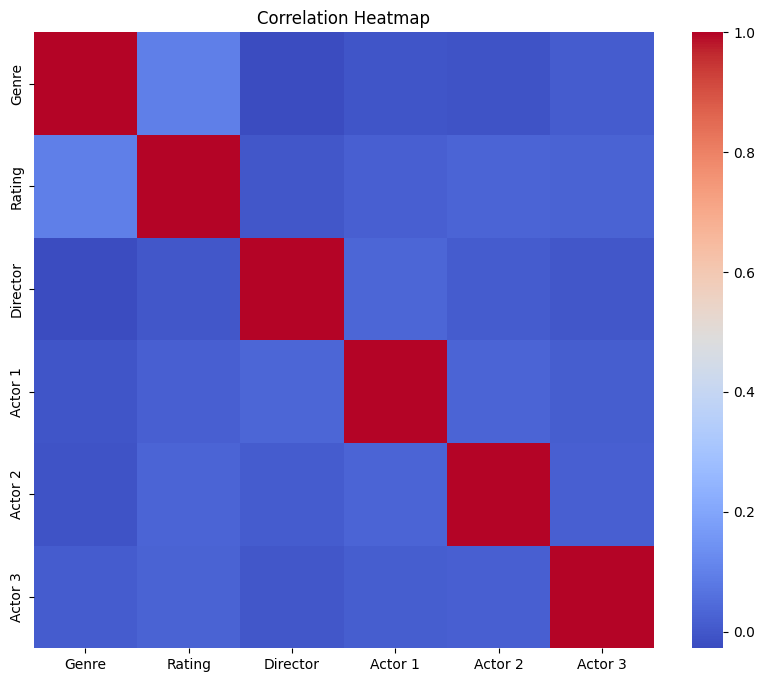

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,annot=False,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
X = data.drop(['Rating'],axis=1)
y = data['Rating']


     

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


     

# Initialize models
lr = LinearRegression()
     

# Train models
lr.fit(X_train, y_train)



LinearRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Linear Regression Metrics:
Mean Squared Error: 1.1155312530229469
Mean Absolute Error: 0.7186776926147526
R-squared: 0.007279099748016882


In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))


Mean Squared Error: 1.08733914784498
Mean Absolute Error: 0.7448350754750073
R-squared: 0.032367497725598215


In [40]:
gb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("R-squared:", r2_score(y_test, y_pred_gb))

Mean Squared Error: 1.0466304264046933
Mean Absolute Error: 0.7126125577869007
R-squared: 0.06859454065854742
